In [77]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('Google-Stock- Price.csv')

In [88]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [89]:
df.shape

(2645, 7)

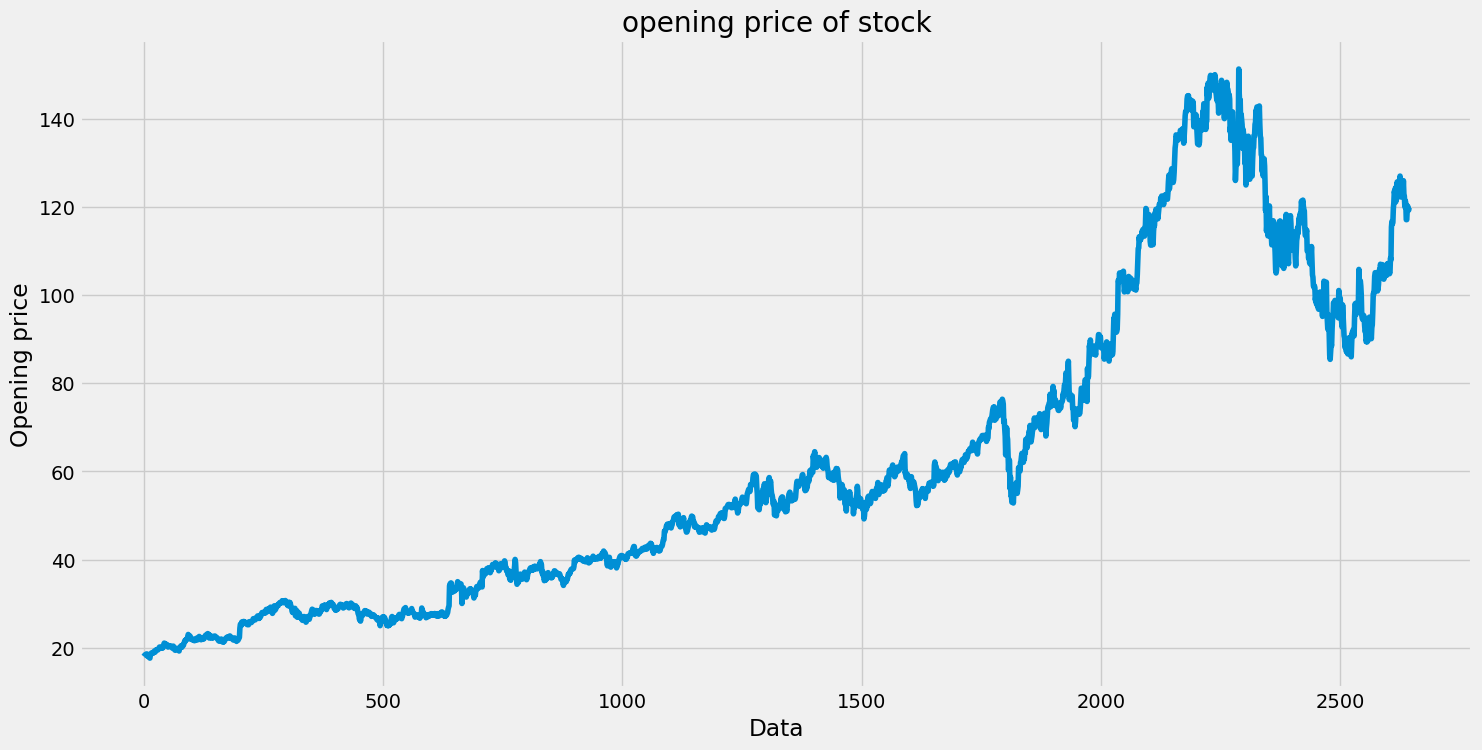

In [90]:
#visualize the opening prices
plt.figure(figsize=(16,8))
plt.title('opening price of stock')
plt.plot(df["Open"])
plt.xlabel('Data')
plt.ylabel('Opening price')
plt.show()

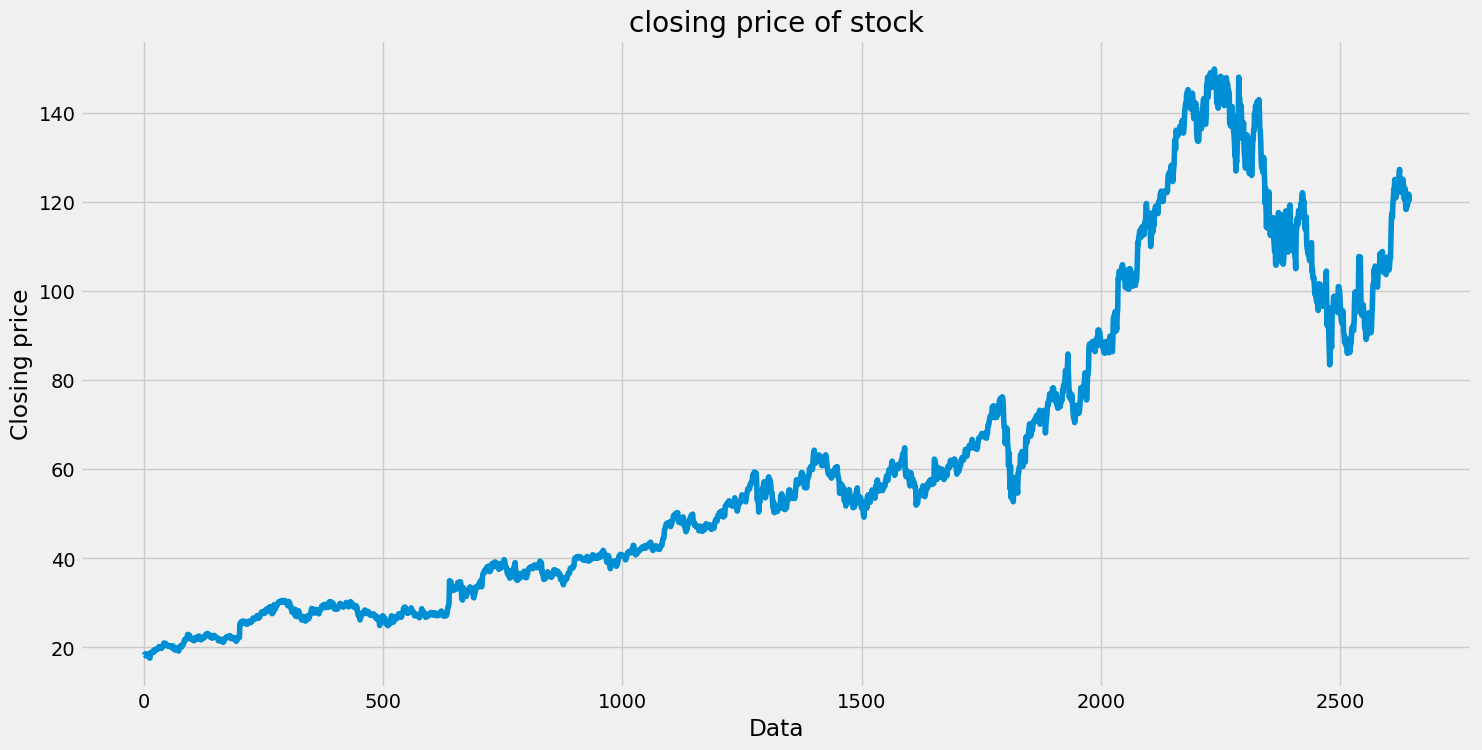

In [91]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

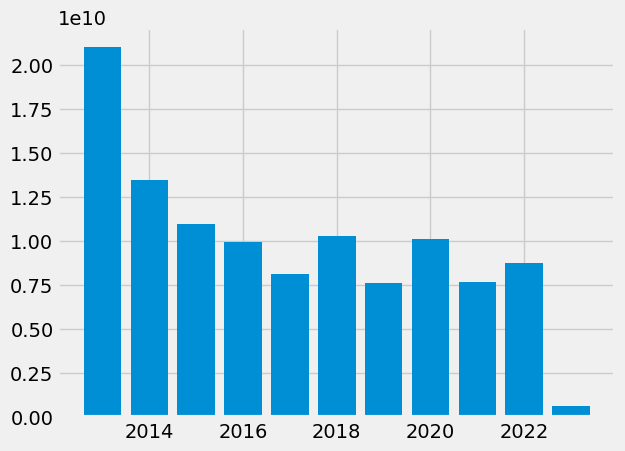

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the existing dataset
df = pd.read_csv('Google_Stock_Price_Updated.csv')
# Group the data by year and sum the volume
df = df.groupby('Year').sum()
# Create the bar plot
plt.bar(df.index, df['Volume'])
# Show the plot
plt.show()

In [125]:
#creating new database with only required columns
data = df.filter(['Close'])
#converting dataframe to numpy array
dataset = data.values
#getting number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

9

In [126]:
#scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard Deviation of processed data: ",scaled_data.std())

MEAN of processed data:  -1.0092936587501423e-16
Standard Deviation of processed data:  1.0


In [127]:
#creating scaled training data
train_data = scaled_data[0:training_data_len, :]
#splitting the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])


In [128]:
#converting x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)
x_train.shape

(0,)

In [129]:
#reshaping the data
print("x_train shape before reshaping",x_train.shape)
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (0,)
x_train shape after reshaping (0,)


In [131]:
#building LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[0],1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

ValueError: Input 0 of layer "lstm_7" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 0, 0, 1)

In [105]:
#compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [132]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [15]:
#training the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
62/62 [==============================] - 9s 103ms/step - loss: 0.0166
Epoch 2/5
62/62 [==============================] - 6s 100ms/step - loss: 0.0019
Epoch 3/5
62/62 [==============================] - 6s 101ms/step - loss: 0.0017
Epoch 4/5
62/62 [==============================] - 6s 105ms/step - loss: 0.0018
Epoch 5/5
62/62 [==============================] - 7s 117ms/step - loss: 0.0015


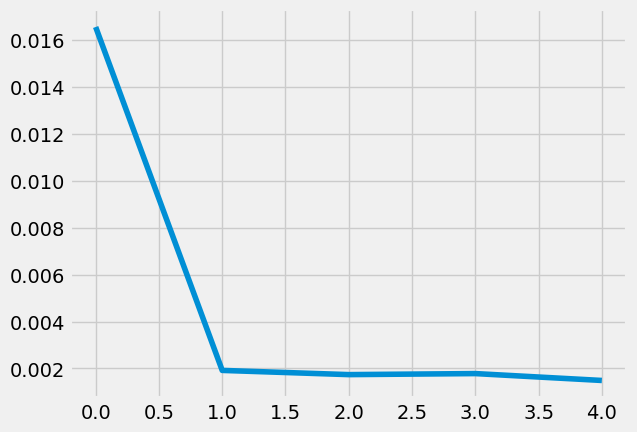

In [16]:
plt.plot(history.history['loss'])

In [17]:
#creating testing dataset
test_data=scaled_data[training_data_len-60:, :]
#create dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [18]:
#converting data into numpy
x_test=np.array(x_test)

In [19]:
#reshaping the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
#getting predicted value from model
predictions = model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

16/16 [==============================] - 1s 36ms/step
[[ 91.076614]
 [ 92.41748 ]
 [ 93.63698 ]
 [ 94.05564 ]
 [ 94.15768 ]
 [ 93.88005 ]
 [ 93.8232  ]
 [ 94.06267 ]
 [ 95.34361 ]
 [ 97.05277 ]
 [ 99.034935]
 [100.90591 ]
 [102.41409 ]
 [103.57958 ]
 [104.39536 ]
 [104.92395 ]
 [105.2977  ]
 [105.56437 ]
 [105.63192 ]
 [105.44379 ]
 [104.88507 ]
 [104.1976  ]
 [103.65971 ]
 [102.82934 ]
 [101.961716]
 [101.485405]
 [101.26906 ]
 [100.89657 ]
 [100.62881 ]
 [100.870735]
 [100.816574]
 [100.81373 ]
 [100.82109 ]
 [101.25628 ]
 [101.57339 ]
 [101.81581 ]
 [102.17749 ]
 [102.55751 ]
 [102.509254]
 [102.246956]
 [101.91075 ]
 [101.638664]
 [101.38024 ]
 [101.160995]
 [100.94224 ]
 [100.88763 ]
 [100.94351 ]
 [101.1646  ]
 [101.89437 ]
 [103.41828 ]
 [105.17279 ]
 [107.04601 ]
 [108.83234 ]
 [110.471664]
 [111.64016 ]
 [112.42951 ]
 [112.79185 ]
 [113.112915]
 [113.33029 ]
 [113.48323 ]
 [113.488625]
 [113.3824  ]
 [113.03805 ]
 [112.88769 ]
 [112.92481 ]
 [112.93907 ]
 [113.37356 ]
 [114.21

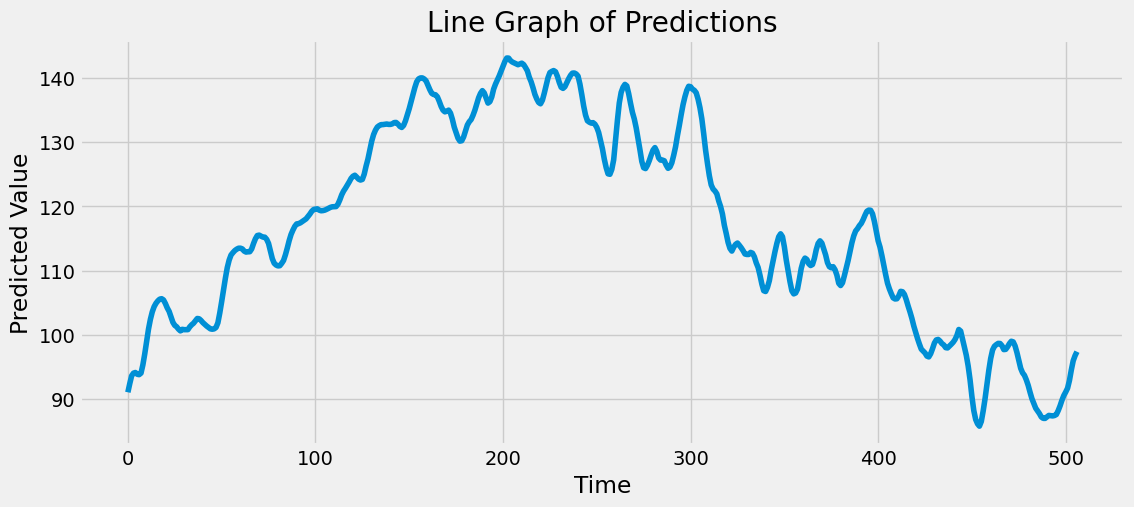

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(predictions)
plt.xlabel("Time")
plt.ylabel("Predicted Value")
plt.title("Line Graph of Predictions")
plt.show()
